In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading data

In [ ]:
dataset = pd.read_excel("world_happiness.xlsx")
rename_dict = {
    "Year": "Year", 
    "Rank": "Rank",
    "Country name": "Country",
    "Ladder score": "Ladder Score",
    "upperwhisker": "Upperwhisker",
    "lowerwhisker": "Lowerwhisker",
    "Explained by: Log GDP per capita": "Log GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Healthy life expectancy",
    "Explained by: Freedom to make life choices": "Freedom to make life choices",
    "Explained by: Generosity": "Generosity",
    "Explained by: Perceptions of corruption": "Perceptions of corruption",
    "Dystopia + residual": "Dystopia + residual"
}
dataset = dataset.rename(columns=rename_dict)

2. Exploring dataset

In [3]:
dataset.head()

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          1969 non-null   int64  
 1   Rank                          1969 non-null   int64  
 2   Country                       1969 non-null   object 
 3   Ladder Score                  1969 non-null   float64
 4   Upperwhisker                  875 non-null    float64
 5   Lowerwhisker                  875 non-null    float64
 6   Log GDP per capita            872 non-null    float64
 7   Social support                872 non-null    float64
 8   Healthy life expectancy       870 non-null    float64
 9   Freedom to make life choices  871 non-null    float64
 10  Generosity                    872 non-null    float64
 11  Perceptions of corruption     871 non-null    float64
 12  Dystopia + residual           868 non-null    float64
dtypes: 

In [5]:
dataset.describe()

,Year,Rank,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,1969.000000,1969.000000,1969.000000,875.000000,875.000000,872.000000,872.000000,870.000000,871.000000,872.000000,871.000000,868.000000
mean,2017.714068,76.430168,5.451903,5.648684,5.418734,1.220279,1.078536,0.542915,0.563730,0.154261,0.144356,1.832778
std,3.964913,43.942744,1.121864,1.103939,1.139063,0.463448,0.355057,0.222944,0.180204,0.086731,0.120290,0.628796
min,2011.000000,1.000000,1.364000,1.427000,1.301000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,2015.000000,38.000000,4.596000,4.885000,4.638164,0.901355,0.850750,0.383000,0.450527,0.092000,0.062000,1.455000
50%,2018.000000,76.000000,5.456200,5.775000,5.529000,1.263500,1.106699,0.555000,0.571000,0.140500,0.113000,1.854000
75%,2021.000000,114.000000,6.295000,6.458500,6.254000,1.567000,1.361000,0.704750,0.676000,0.205000,0.180000,2.237078
max,2024.000000,158.000000,7.856000,7.904000,7.780000,2.209000,1.840000,1.137814,1.018000,0.569814,0.587000,3.482000


3. Global average happiness over time!

In [6]:
dataset_average = (
    dataset
    .groupby("Year", as_index=False)["Ladder Score"]
    .mean()
    .rename(columns={"Ladder Score": "Average Happiness"})
)

In [7]:
dataset_average

,Year,Average Happiness
0,2011,5.391538
1,2012,5.418731
2,2014,5.375741
3,2015,5.382185
4,2016,5.354019
5,2017,5.375878
6,2018,5.407096
7,2019,5.473240
8,2020,5.532839
9,2021,5.553575


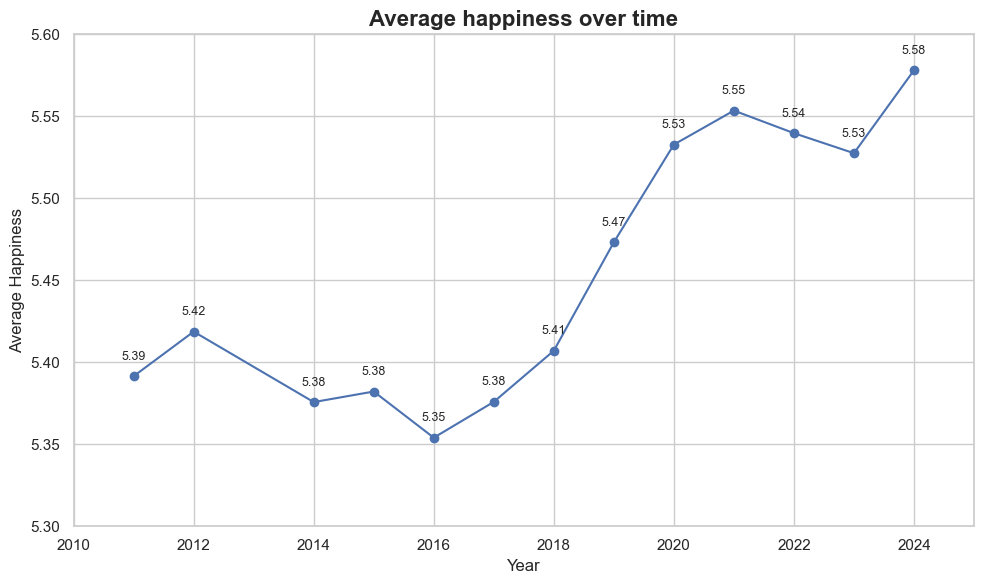

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

for x, y in zip(dataset_average["Year"],
                dataset_average["Average Happiness"]):
    plt.text(x, y + 0.01, f"{y:.2f}", ha='center', fontsize=9)

plt.plot(dataset_average["Year"],
         dataset_average["Average Happiness"],
         marker="o")
plt.title("Average happiness over time", fontsize=16, weight='bold')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Happiness", fontsize=12)
plt.ylim(5.3, 5.6)
plt.xlim(2010, 2025)


plt.tight_layout()
plt.show()

4. Correlation Heatmap

In [9]:
dataset_prep = dataset[["Ladder Score", "Log GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Dystopia + residual"]]

In [10]:
dataset_corr = dataset_prep.corr(numeric_only=True)
single_corr = dataset_corr[["Ladder Score"]].sort_values(by="Ladder Score", ascending=False)

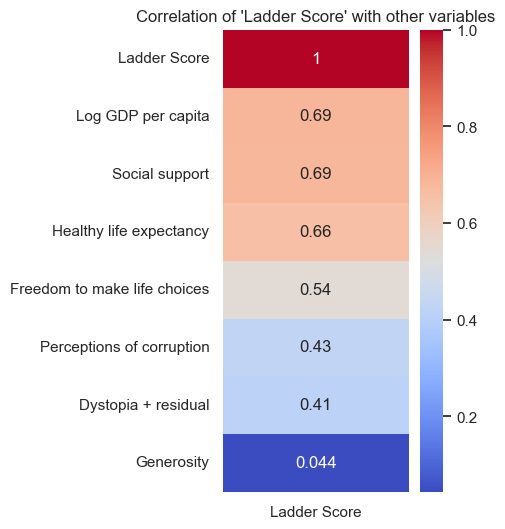

In [11]:
plt.figure(figsize=(3, 6))
sns.heatmap(single_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of 'Ladder Score' with other variables")
plt.show()

5. Dataset 2024

In [12]:
dataset_2024 = dataset[(dataset["Year"] == 2024)]
dataset_2024

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391


5.1 Top 10 Happiest Countires in the World!

In [13]:
dataset_top = dataset_2024.sort_values("Ladder Score", ascending=False).head(10)
dataset_top

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
71,2024,6,Costa Rica,7.274,7.361,7.187,1.492,1.600,0.680,0.948,0.067,0.118,2.369
84,2024,7,Norway,7.262,7.353,7.171,1.902,1.711,0.863,0.962,0.168,0.425,1.231
97,2024,8,Israel,7.234,7.301,7.168,1.695,1.743,0.824,0.740,0.144,0.193,1.895
109,2024,9,Luxembourg,7.122,7.213,7.031,2.028,1.558,0.864,0.931,0.117,0.397,1.227
122,2024,10,Mexico,6.979,7.068,6.889,1.435,1.504,0.550,0.879,0.057,0.118,2.438


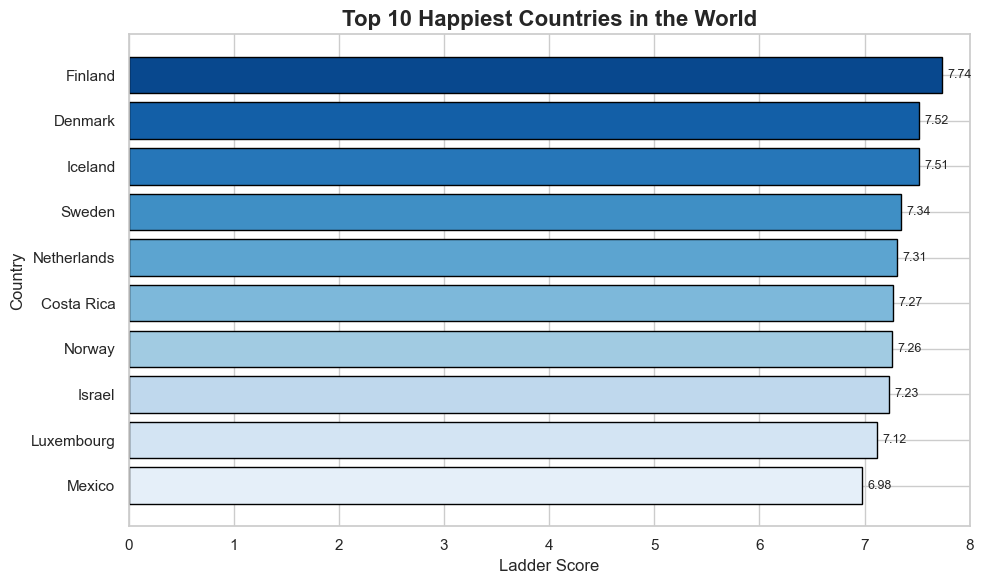

In [14]:

colors = sns.color_palette("Blues_r", len(dataset_top))
plt.figure(figsize=(10, 6))

bars = plt.barh(dataset_top["Country"], dataset_top["Ladder Score"], color=colors, edgecolor="black")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=9)

plt.gca().invert_yaxis()
plt.title("Top 10 Happiest Countries in the World", fontsize=16, weight='bold')

plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xlim(0, 8)


plt.tight_layout()
plt.show()

5.2 Top 10 Saddest Countries in the World!

In [15]:
dataset_bottom = dataset_2024.sort_values("Ladder Score", ascending=True).head(10)
dataset_bottom

,Year,Rank,Country,Ladder Score,Upperwhisker,Lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1956,2024,147,Afghanistan,1.364,1.427,1.301,0.649,0.000,0.155,0.000,0.075,0.135,0.348
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1892,2024,142,Botswana,3.438,3.576,3.301,1.388,1.146,0.094,0.697,0.018,0.083,0.012
1879,2024,141,DR Congo,3.469,3.608,3.331,0.544,0.929,0.278,0.600,0.151,0.061,0.906
1866,2024,140,Yemen,3.561,3.714,3.408,0.631,1.482,0.375,0.447,0.066,0.106,0.454
1853,2024,139,Comoros,3.754,3.919,3.590,0.835,0.501,0.428,0.260,0.117,0.164,1.450
1840,2024,138,Lesotho,3.757,3.957,3.558,0.737,1.131,0.000,0.606,0.065,0.072,1.145


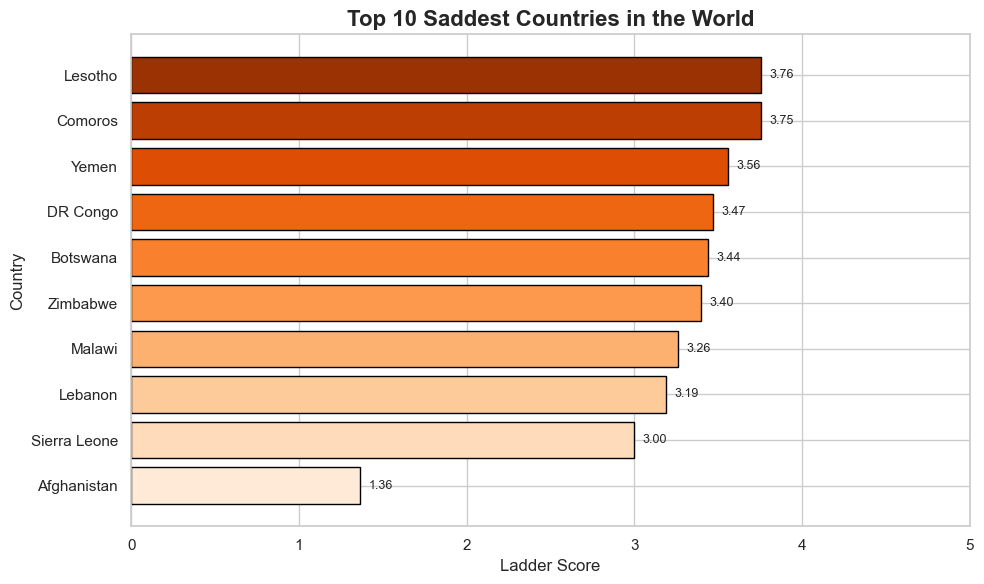

In [16]:
colors = sns.color_palette("Oranges", len(dataset_top))
plt.figure(figsize=(10, 6))

bars = plt.barh(dataset_bottom["Country"], dataset_bottom["Ladder Score"], color=colors, edgecolor="black")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}", va='center', fontsize=9)

plt.title("Top 10 Saddest Countries in the World", fontsize=16, weight='bold')

plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.xlim(0, 5)


plt.tight_layout()
plt.show()